In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import dp_algorithms

data = pd.read_csv('data/student-por.csv', sep = ';')

data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [2]:
# convert all the features into numerical ones
data['school']     = data['school'].apply(lambda x: 0 if x == "GP" else 1)
data['sex']        = data['sex'].apply(lambda x: 0 if x == "F" else 1)
data['paid']       = data['paid'].apply(lambda x: 0 if x == "no" else 1)
data['address']    = data['address'].apply(lambda x: 0 if x == "R" else 1)
data['famsize']    = data['famsize'].apply(lambda x: 0 if x == "GT3" else 1)
data['Pstatus']    = data['Pstatus'].apply(lambda x: 0 if x == "A" else 1)
data['Mjob']       = data['Mjob'].apply(lambda x: 1 if x == "teacher" else 2 \
                                        if x == "health" else 3 if x == "services" else 4 \
                                        if x == "at_home" else 5)
data['Fjob']       = data['Fjob'].apply(lambda x: 1 if x == "teacher" else 2 \
                                        if x == "health" else 3 if x == "services" else 4 \
                                        if x == "at_home" else 5)
data['reason']     = data['reason'].apply(lambda x: 1 if x == "home" else 2 \
                                          if x == "reputation" else 3 if "course" else 4)
data['guardian']   = data['guardian'].apply(lambda x: 1 if x == "mother" else 2 \
                                            if x == "father" else 3)
data['schoolsup']  = data['schoolsup'].apply(lambda x: 0 if x == "no" else 1)
data['famsup']     = data['famsup'].apply(lambda x: 0 if x == "no" else 1)
data['activities'] = data['activities'].apply(lambda x: 0 if x == "no" else 1)
data['nursery']    = data['nursery'].apply(lambda x: 0 if x == "no" else 1)
data['higher']     = data['higher'].apply(lambda x: 0 if x == "no" else 1)
data['internet']   = data['internet'].apply(lambda x: 0 if x == "no" else 1)
data['romantic']   = data['romantic'].apply(lambda x: 0 if x == "no" else 1)

In [3]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,4,1,...,4,3,4,1,1,3,4,0,11,11
1,0,0,17,1,0,1,1,1,4,5,...,5,3,3,1,1,3,2,9,11,11
2,0,0,15,1,1,1,1,1,4,5,...,4,3,2,2,3,3,6,12,13,12
3,0,0,15,1,0,1,4,2,2,3,...,3,2,2,1,1,5,0,14,14,14
4,0,0,16,1,0,1,3,3,5,5,...,4,3,2,1,2,5,0,11,13,13


In [4]:
target = data['G3']
data = data.drop('G3', axis = 1)
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0,0,18,1,0,0,4,4,4,1,...,0,4,3,4,1,1,3,4,0,11
1,0,0,17,1,0,1,1,1,4,5,...,0,5,3,3,1,1,3,2,9,11
2,0,0,15,1,1,1,1,1,4,5,...,0,4,3,2,2,3,3,6,12,13
3,0,0,15,1,0,1,4,2,2,3,...,1,3,2,2,1,1,5,0,14,14
4,0,0,16,1,0,1,3,3,5,5,...,0,4,3,2,1,2,5,0,11,13


In [5]:
# center the features and ensure that each row has its euclidean norm <= 1
data = data - data.mean()
data = data.divide(np.linalg.norm(data.values, axis = 1), axis = 0)

data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,-0.028101,-0.033075,0.101339,0.024495,-0.023874,-0.070751,0.119866,0.136652,0.023625,-0.246074,...,-0.029718,0.005595,-0.014548,0.065777,-0.040536,-0.103329,-0.043271,0.027480,-0.919886,-0.046007
1,-0.077373,-0.091068,0.056832,0.067445,-0.065733,0.027389,-0.336540,-0.290321,0.065048,0.211236,...,-0.081824,0.237598,-0.040056,-0.041083,-0.111609,-0.284501,-0.119141,-0.368721,-0.533054,-0.126673
2,-0.074360,-0.087521,-0.372458,0.064818,0.150365,0.026322,-0.323433,-0.279015,0.062515,0.203009,...,-0.078637,0.014806,-0.038496,-0.253022,0.106276,0.153655,-0.114501,0.499792,0.128320,0.305337
3,-0.050302,-0.059205,-0.251955,0.043847,-0.042734,0.017806,0.214563,-0.044293,-0.246614,-0.151574,...,0.091256,-0.134436,-0.170493,-0.171161,-0.072560,-0.184960,0.211447,-0.528617,0.375707,0.351002
4,-0.066354,-0.078098,-0.141809,0.057839,-0.056371,0.023488,0.092484,0.132120,0.246330,0.181151,...,-0.070170,0.013212,-0.034351,-0.225778,-0.095714,-0.053435,0.278920,-0.697300,-0.076042,0.272461


In [6]:
# split the data into training(80%) and testing, then perform non-private pca on the training set
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.2)

# compute the empirical covariance matrix
empirical_covariance_matrix = np.matmul(x_train.transpose(), x_train)
empirical_covariance_matrix = empirical_covariance_matrix / x_train.shape[0]

# calculate the eigenvalues and eigenvectors and sort the eigenvectors after the eigenvalues
eigen_values, eigen_vectors = np.linalg.eig(empirical_covariance_matrix)

idx = eigen_values.argsort()[::-1]
eigen_values  = eigen_values[idx]
eigen_vectors = eigen_vectors[:, idx] 

# display the eigenvalues
print("Eigenvalues: \n{}".format(eigen_values))

Eigenvalues: 
[0.28550384 0.22519568 0.07693593 0.05680089 0.0486424  0.03519235
 0.03441278 0.02953854 0.02623643 0.02053261 0.01831094 0.01763498
 0.01633062 0.01460836 0.01157298 0.0102626  0.00824116 0.00750287
 0.0068035  0.00637139 0.00583048 0.00557279 0.00537137 0.0046555
 0.00430888 0.00370726 0.00354284 0.00289487 0.00220833 0.00216671
 0.00156435 0.00154576]


In [7]:
# compute the top-k subspace for k = 1 to k = 20, do linear regression on each of these projections and store the 
# rms error
rmse = []
for i in range(1, 21):
    projected_train = np.matmul(x_train, eigen_vectors[:,:i])
    projected_test  = np.matmul(x_test, eigen_vectors[:, :i])
    
    regression = LinearRegression().fit(projected_train, y_train)
    rmse.append(((y_test - regression.predict(projected_test)) ** 2).sum())
    
print("RMSE: {}".format(rmse))

RMSE: [543.5976879257631, 246.02690373239886, 242.84890176940917, 239.05261078685123, 234.23399182767255, 233.23752317095455, 231.23410999031796, 233.59138022550258, 236.42942894838015, 232.9796561540165, 234.5784227324543, 234.86053708106945, 233.76245259896902, 233.74941315862978, 229.3274997710133, 230.26332461332518, 230.10959080884845, 230.10417402808042, 230.21540826186208, 233.6191208568015]


## The Gaussian Mechanism

In [8]:
delta   = [0.001, 0.01, 0.1, 0.5, 1, 1.2]
epsilon = [0.001, 0.01, 0.1, 0.5, 1]

rmse_gaussian_mechanism = []
for _delta in delta:
    for _epsilon in epsilon:
        
        print("=" * 100)
        print("Running for delta {} and epsilon {}".format(_delta, _epsilon))
        
        noisy_empirical_covariance_matrix = dp_algorithms.gaussian_mechanism(x_train, _epsilon, _delta)
        
        # calculate the eigenvalues and eigenvectors and sort the eigenvectors after the eigenvalues
        eigen_values, eigen_vectors = np.linalg.eig(noisy_empirical_covariance_matrix)

        idx = eigen_values.argsort()[::-1]
        eigen_values  = eigen_values[idx]
        eigen_vectors = eigen_vectors[:, idx] 
        
        # display the eigenvalues
        print("Eigenvalues: \n{}".format(eigen_values))
        
        # compute the top-k subspace for k = 1 to k = 12, do linear regression on each of these projections and store the 
        # rms error
        rmse_temporary = []
        for i in range(1, 20):
            projected_train = np.matmul(x_train, eigen_vectors[:,:i])
            projected_test  = np.matmul(x_test, eigen_vectors[:, :i])

            regression = LinearRegression().fit(projected_train, y_train)
            rmse_temporary.append(((y_test - regression.predict(projected_test)) ** 2).sum())

        print("RMSE: {}".format(rmse_temporary))
        rmse_gaussian_mechanism.append(rmse_temporary)

Running for delta 0.001 and epsilon 0.001
Eigenvalues: 
[ 1.51484019e+08  1.27090625e+08  1.21571515e+08  1.11651285e+08
  1.05463138e+08  8.77037846e+07  7.99305410e+07  5.87630400e+07
  5.36466093e+07  4.71556117e+07  3.57298299e+07  3.31044647e+07
  2.54578457e+07  1.92075412e+07  1.46560819e+07  1.01382655e+07
 -2.42642908e+06 -6.70395737e+06 -1.55159934e+07 -1.72040767e+07
 -3.31506658e+07 -3.87420614e+07 -4.96691485e+07 -5.61524276e+07
 -6.65393355e+07 -8.17758616e+07 -8.62797730e+07 -9.93137054e+07
 -1.06633318e+08 -1.20978394e+08 -1.26616668e+08 -1.37654553e+08]
RMSE: [903.428107669338, 926.6941662606048, 395.2029372903943, 320.41317639481565, 279.0320587695963, 277.39940475073837, 278.6717750443236, 280.1734443477369, 280.0937744893072, 305.31425410631493, 305.43417040095045, 301.9946725796634, 299.90705037344134, 303.2069779562437, 273.8997773873713, 283.56116711173445, 279.55337138771984, 280.1689678417602, 280.1748806954281]
Running for delta 0.001 and epsilon 0.01
Eigenval

Eigenvalues: 
[ 362.33125548  328.8102975   315.60344202  272.92313483  264.96199413
  249.36178298  231.11621768  208.28882448  156.40363314  117.50125272
  107.51176907   98.15719996   66.18421629   53.40770915   25.56394524
    9.06506983    2.28788006  -36.1555399   -50.00279835  -57.70742079
  -86.44343482 -107.8198032  -131.66621726 -164.36581654 -202.19390998
 -225.42373083 -250.51827051 -265.43611453 -274.00100291 -281.93336461
 -320.74312564 -381.51460223]
RMSE: [1013.1812813109159, 879.9423863600446, 917.1889652580171, 913.438349896227, 715.995095003413, 440.57278944750726, 413.7469958531986, 411.26904120746906, 404.4014191531041, 378.75824063821847, 278.8795951647531, 270.07180430495794, 269.71245900866427, 270.11647002419113, 276.08038984467015, 265.47603409287626, 235.58733352908064, 238.3434888306885, 237.98145193008915]
Running for delta 0.01 and epsilon 1
Eigenvalues: 
[ 92.4014014   91.25515176  86.23793707  73.41033315  60.66860355
  60.17556576  52.40310557  47.86746

RMSE: [1011.950573709293, 968.6304774695582, 969.6191777433824, 518.3144406941676, 450.0613853312195, 395.44440390974626, 392.28486470508153, 361.6167758189049, 339.0433172042671, 332.23536554062883, 338.5844905459671, 278.4007711340797, 287.8748297056884, 281.14127272982887, 282.3864311144011, 293.37280900580566, 299.9939109115826, 298.55044498265795, 303.3915211012394]
Running for delta 0.5 and epsilon 0.1
Eigenvalues: 
[ 1718.9423462   1546.53451687  1427.17040881  1334.98209394
  1250.69323556  1146.5096267    975.70359114   881.92096074
   793.34873781   720.52368552   590.27336338   422.76292307
   346.74353369   231.45621465   158.38419001    37.3969157
    12.8760261    -96.5005159   -233.64368331  -396.88546081
  -450.78999246  -559.06401832  -658.37592454  -808.89577211
  -868.52968641 -1145.0340133  -1196.21907456 -1290.33207168
 -1427.13667196 -1568.99946098 -1675.88838418 -1775.54141402]
RMSE: [927.0267150566742, 869.5064705076243, 612.0996836458517, 588.28842792745, 584.2

Eigenvalues: 
[ 952411.23243503  779230.68038602  726453.34396842  569095.55895003
  508477.48746913  465932.65157544  412353.23574713  324095.76851228
  308547.1547446   266729.24840668  210845.09067366  157685.96856085
  128986.85525528  121748.10458064   56646.93297982   33888.27071847
   12105.44465627  -75010.39645591  -88197.6929162  -105552.15271856
 -147564.41384607 -188587.57265837 -282986.49081371 -303571.81442509
 -314878.81749291 -375078.81017373 -462295.60668544 -592178.75869402
 -619101.37956921 -727447.74957202 -799475.26796967 -920145.07668231]
RMSE: [846.5486824214213, 617.1790642261999, 505.44988596858894, 428.91502831074354, 324.25976598964024, 342.19202558127154, 341.53811521788464, 349.56286249992837, 339.7815176459677, 292.33122874676343, 275.4175872481062, 281.4338999010964, 283.6330245474441, 282.6744325917722, 281.8862329667629, 281.7404295062197, 283.84381247018734, 283.0000396257915, 288.5083028008027]
Running for delta 1.2 and epsilon 0.01
Eigenvalues: 
[ 92

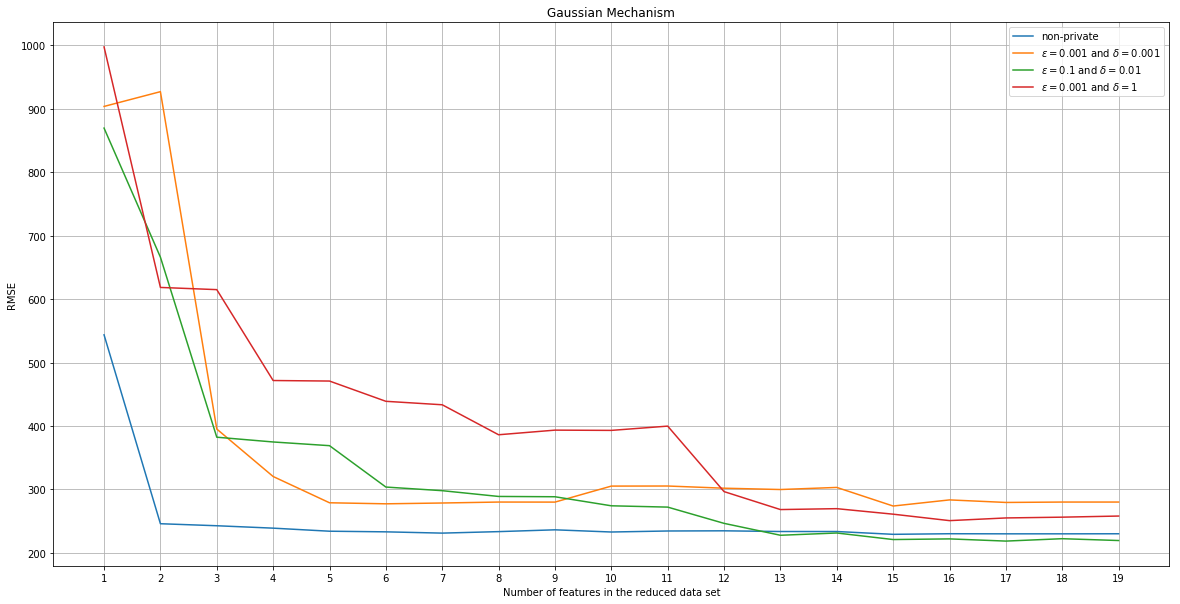

In [30]:
fig = plt.figure(figsize = (20, 10))
ax  = fig.add_subplot(1, 1, 1)
plt.grid()
plt.xlabel("Number of features in the reduced data set")
plt.ylabel("RMSE")
plt.title("Gaussian Mechanism")
plt.plot(range(1, 20), rmse[:-1], label = 'non-private')
plt.plot(range(1, 20), rmse_gaussian_mechanism[0], label = '$\epsilon = 0.001$ and $\delta = 0.001$')
plt.plot(range(1, 20), rmse_gaussian_mechanism[7], label = '$\epsilon = 0.1$ and $\delta = 0.01$')
plt.plot(range(1, 20), rmse_gaussian_mechanism[20], label = '$\epsilon = 0.001$ and $\delta = 1$')
plt.legend(loc = 'best')
ax.set_xticks(range(1, 20))
plt.show()

## Wishart Input Perturbation

In [9]:
epsilon = [0.001, 0.01, 0.1, 0.5, 1, 2]

rmse_wishart_mechanism = []
for _epsilon in epsilon:
    
    print("=" * 100)
    print("Running for epsilon {}".format(_epsilon))
    noisy_empirical_covariance_matrix = dp_algorithms.wishart_mechanism(x_train, _epsilon)
    
    eigen_values, eigen_vectors = np.linalg.eig(noisy_empirical_covariance_matrix)

    idx = eigen_values.argsort()[::-1]
    eigen_values  = eigen_values[idx]
    eigen_vectors = eigen_vectors[:, idx] 
    
    print("Eigenvalues: {}".format(eigen_values))
    
    rmse_temporary = []
    for i in range(1, 20):
        projected_train = np.matmul(x_train, eigen_vectors[:,:i])
        projected_test  = np.matmul(x_test, eigen_vectors[:, :i])

        regression = LinearRegression().fit(projected_train, y_train)
        rmse_temporary.append(((y_test - regression.predict(projected_test)) ** 2).sum())

    print("RMSE: {}".format(rmse_temporary))
    
    rmse_wishart_mechanism.append(rmse_temporary)

Running for epsilon 0.001
Eigenvalues: [3.15072102e+02 2.78498422e+02 2.37582606e+02 2.23975055e+02
 2.09968863e+02 1.92653334e+02 1.83665709e+02 1.53350571e+02
 1.41562815e+02 1.37778586e+02 1.15202485e+02 1.07042911e+02
 9.15700825e+01 8.32889525e+01 7.76609680e+01 6.47939000e+01
 6.27068848e+01 5.66685742e+01 4.47846985e+01 3.70594260e+01
 3.30149308e+01 3.03179639e+01 2.46495460e+01 1.63328571e+01
 1.54831306e+01 1.11106950e+01 8.64018489e+00 6.94758773e+00
 4.56711387e+00 2.61650366e+00 1.01872452e+00 2.98836751e-01]
RMSE: [786.3024510265732, 710.8613078708047, 668.0205007508214, 486.5219364035253, 398.65255705719676, 372.8084079410155, 361.96425860743614, 343.0563387910808, 327.5536091332956, 328.0718099579598, 320.07994662442707, 319.968887086594, 297.2759904616618, 291.04253208810445, 305.1635052737636, 312.48329446399794, 301.4162766124619, 306.8934098411109, 267.7565172460086]
Running for epsilon 0.01
Eigenvalues: [3.38371293e+01 2.94370538e+01 2.87364894e+01 2.57141192e+01
 

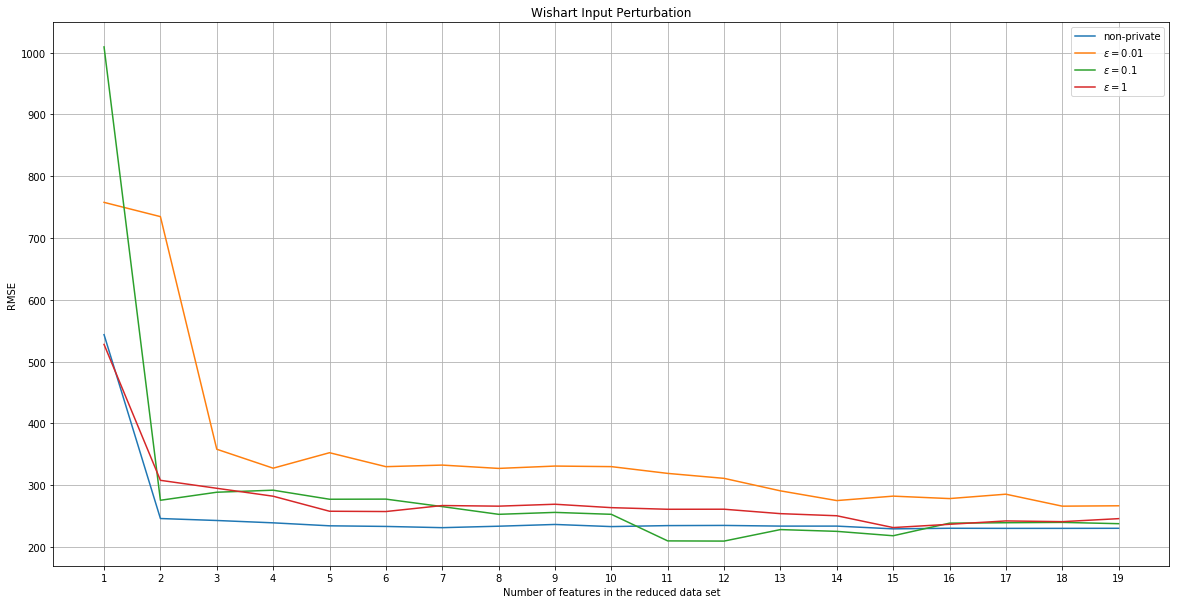

In [29]:
fig = plt.figure(figsize = (20, 10))
ax  = fig.add_subplot(1, 1, 1)
plt.grid()
plt.xlabel("Number of features in the reduced data set")
plt.ylabel("RMSE")
plt.title("Wishart Input Perturbation")
plt.plot(range(1, 20), rmse[:-1], label = 'non-private')
plt.plot(range(1, 20), rmse_wishart_mechanism[1], label = '$\epsilon = 0.01$')
plt.plot(range(1, 20), rmse_wishart_mechanism[2], label = '$\epsilon = 0.1$')
plt.plot(range(1, 20), rmse_wishart_mechanism[4], label = '$\epsilon = 1$')
plt.legend(loc = 'best')
ax.set_xticks(range(1, 20))
plt.show()